In [7]:
# Import required packages
import numpy as np
import pandas as pd
import csv
!pip install stop_words
# Define function for tokenize and lemmatizing
import nltk
from nltk.collocations import *
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

import spacy
import en_core_web_sm
from textblob import Word
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import matplotlib.pyplot as plt
% matplotlib inline

[nltk_data] Downloading package punkt to /Users/thiphan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thiphan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/thiphan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
UsageError: Line magic function `%` not found.


In [8]:
# read dataset
df = pd.read_csv('abcdataset_cleaned.csv')
df

,Unnamed: 0,id,tracking_number,date,sender_id,sender_zipCode,receiver_id,receiver_address,service,quantity,actual_weight,rate,description,buy_in_store,extra_charge,agent_id
0,0,26838,ABC-018111,2021-09-05,5249,75040.0,15267,DA NANG,TINH,1,7.4,4.5,loc ensure,57.0,0.0,ABC
1,1,26835,ABC-018108,2021-09-05,2357,75098.0,12053,SAI GON,SAIGON,1,17.4,3.5,snack chocolate food,0.0,0.0,ABC
2,2,26834,ABC-018107,2021-09-05,2357,75098.0,2999,SAI GON,SAIGON,1,12.0,3.5,snack food,0.0,0.0,ABC
3,3,26832,ABC-018105,2021-09-05,7188,75042.0,13168,TIEN GIANG,TINH,1,2.0,4.5,vitamins,0.0,36.0,ABC
4,4,26831,ABC-018104,2021-09-05,166,79761.0,168,BINH THUAN,TINH,2,94.0,4.5,iphone used imei 359497080983070 snack milk po...,0.0,70.0,ABC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19946,21889,2210,ABC-001540,2019-12-20,2996,75042.0,3946,SAI GON,SAIGON,1,23.8,3.0,clothes hand bag vi kinh xe camera,0.0,7.0,ABC
19947,21890,2209,ABC-001539,2019-12-20,218,75149.0,933,DONG NAI,TINH,1,37.2,3.0,milk powder,0.0,0.0,ABC
19948,21891,2208,ABC-001538,2019-12-20,3045,75075.0,4027,SAI GON,SAIGON,1,10.4,3.0,lotions kim thu duong medicated oil men,9.0,0.0,ABC
19949,21892,2207,ABC-001537,2019-12-20,2794,75081.0,3636,DONG NAI,TINH,1,12.5,4.0,soap snack it giftset lotion,0.0,0.0,ABC


# text cleaning

In [9]:
listofcontent = []
for i in df['description']:
  listofcontent.append(i)
print(listofcontent)

['loc ensure', 'snack chocolate food', 'snack food', 'vitamins', 'iphone used imei 359497080983070 snack milk powder ensure soap food hop vitamins gummies nut lotion food home goods', 'medicated oil chia seed supplement food canned snack dried fruit vitamin it vien quan', 'vitamin syrup', 'vitamins', 'food hop1 gia vi vitamin gummy hand sanitizer', 'lo toothpaste vitamin c snack ho vitamin', 'lo medicated oil vitamins', 'vitamins gummies', 'loc ensure snack vitamins', 'vitamins soap medicated oil', 'medicated oil vitamins snack', 'clothes snack supplement vitamins shoes', 'toothpaste pack mat ong vitamins snack salonpas giftset ', 'food snack food hop supplement oatmeal bengay', 'vitamin vitamin doi sandals hat medicated oil', 'supplement  lotion duong da toys clothes snackmilk powder rua mat', 'medicated oil milk powder ensure it giftset do trang rang food hop vitamins', 'supplement snack shampoo khan tam  mem', 'vitamins', 'lo medicated oil snack clothes vitamins shoes toys', 'laptop

In [10]:
content = pd.DataFrame(listofcontent, columns = ['contents'])
content['contents'] = content['contents'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
content['contents'] = content['contents'].str.replace('[^\w\s]','')
content['contents'] = content['contents'].str.lower()
content['contents']

0                                               loc ensure
1                                     snack chocolate food
2                                               snack food
3                                                 vitamins
4        iphone used imei snack milk powder ensure soap...
                               ...                        
19946                   clothes hand bag vi kinh xe camera
19947                                          milk powder
19948              lotions kim thu duong medicated oil men
19949                         soap snack it giftset lotion
19950                        clothes perfume dt samsung j3
Name: contents, Length: 19951, dtype: object

In [11]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [15]:
stopwords = set(STOPWORDS)
text = " ".join(contents for contents in content['contents'])

## word cloud

<function matplotlib.pyplot.show(*args, **kw)>

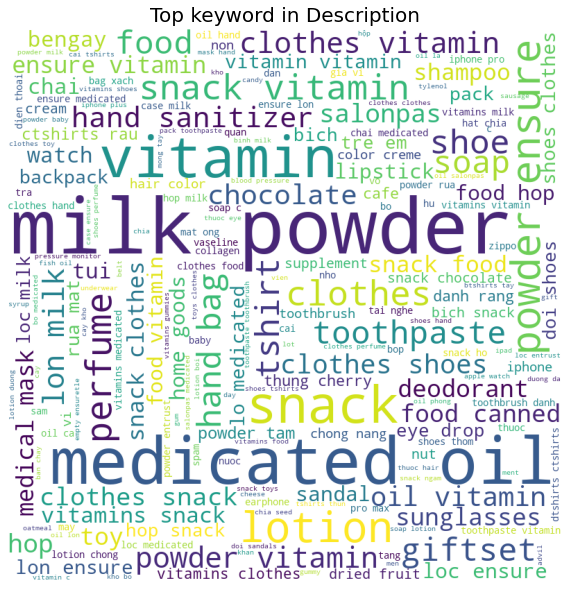

In [16]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.title('Top keyword in Description', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show

## work tokenization

In [17]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['loc', 'ensure', 'snack', 'chocolate', 'food', 'snack', 'food', 'vitamins', 'iphone', 'used', 'imei', 'snack', 'milk', 'powder', 'ensure', 'soap', 'food', 'hop', 'vitamins', 'gummies', 'nut', 'lotion', 'food', 'home', 'goods', 'medicated', 'oil', 'chia', 'seed', 'supplement', 'food', 'canned', 'snack', 'dried', 'fruit', 'vitamin', 'it', 'vien', 'quan', 'vitamin', 'syrup', 'vitamins', 'food', 'hop1', 'gia', 'vi', 'vitamin', 'gummy', 'hand', 'sanitizer', 'lo', 'toothpaste', 'vitamin', 'c', 'snack', 'ho', 'vitamin', 'lo', 'medicated', 'oil', 'vitamins', 'vitamins', 'gummies', 'loc', 'ensure', 'snack', 'vitamins', 'vitamins', 'soap', 'medicated', 'oil', 'medicated', 'oil', 'vitamins', 'snack', 'clothes', 'snack', 'supplement', 'vitamins', 'shoes', 'toothpaste', 'pack', 'mat', 'ong', 'vitamins', 'snack', 'salonpas', 'giftset', 'food', 'snack', 'food', 'hop', 'supplement', 'oatmeal', 'bengay', 'vitamin', 'vitamin', 'doi', 'sandals', 'hat', 'medicated', 'oil', 'supplement', 'lotion', 'duong'

## Frequency Distribution

In [18]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 3251 samples and 120748 outcomes>


In [19]:
fdist.most_common(2)

[('snack', 6526), ('vitamin', 6396)]

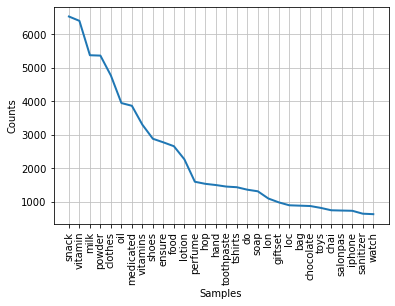

In [20]:
# Frequency Distribution Plot

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()